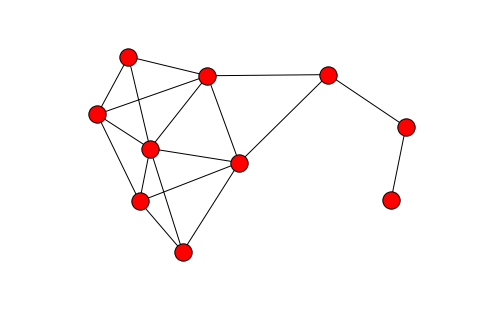

In [13]:
import networkx as net
import matplotlib.pyplot as plot
%matplotlib inline
#Generate the requested graph from scratch
g = net.Graph()
g.add_edges_from([("Beverly","Andre"),("Beverly","Ed"),("Beverly","Diane"),("Beverly","Garth")])
g.add_edges_from([("Andre","Carol"),("Andre","Fernando"),("Andre","Diane")])
g.add_edges_from([("Ed","Diane"),("Ed","Garth")])
g.add_edges_from([("Diane","Carol"),("Diane","Fernando"),("Diane","Garth")])
g.add_edges_from([("Carol","Fernando")])
g.add_edges_from([("Garth","Fernando"),("Garth","Heather")])
g.add_edges_from([("Fernando","Heather")])
g.add_edges_from([("Heather","Ike")])
g.add_edges_from([("Ike","Jane")])
net.draw(g, pos=net.spring_layout(g), labels={"Beverly":"Beverly","Andre":"Andre",
                                              "Ed":"Ed","Garth":"Garth","Carol":"Carol",
                                             "Fernando":"Fernando","Diane":"Diane","Heather":"Heather",
                                             "Ike":"Ike","Jane":"Jane"})
plot.axis('off')
plot.show()

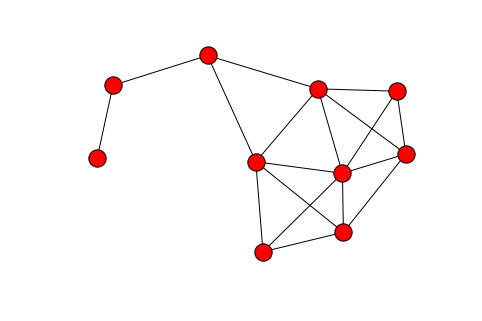

In [14]:
#Generate the requested graph from a krackhardt generator
gg = net.generators.small.krackhardt_kite_graph()
net.draw(gg, labels={0:"Andre", 1:"Beverly", 2:"Carol", 3:"Diane", 4:"Ed", 5:"Fernando", 
                     6:"Garth", 7:"Heather", 8:"Ike", 9:"Jane"})
plot.show()

In [3]:
#Bonus Points.  Generate graph using NHL Data
#NHL Captains - http://www.hockey-reference.com/leagues/NHL_2017_captains.html
import csv
import requests
import pandas as pd
import io
import graphlab as gl
from graphlab import SGraph, Vertex, Edge, canvas
canvas.set_target('ipynb')
url = 'https://raw.githubusercontent.com/john-grando/Masters/master/DATA620/Week1/Homework/NHLCaptainList.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
teamlist = []
teamverts = []
verts = []
nationlist = []
NHLTeams = SGraph()
NHLN = SGraph()

This non-commercial license of GraphLab Create for academic use is assigned to john.grando@spsmail.cuny.edu and will expire on June 05, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1497207436.log


In [4]:
#NHL organized by Teams and Captains
NHLTeams = NHLTeams.add_vertices(Vertex("NHL"))
for index, row in df.iterrows():
    if not isinstance(row['player'], basestring):
        player = "Vacant"
    else:
        player = str(row['player'])
    team = str(row['team'])
    teamverts.append(Vertex(team))
    teamlist.append(team)
    teamverts.append(Vertex(player))

In [5]:
NHLTeams = NHLTeams.add_vertices(teamverts)

In [6]:
for index, row in df.iterrows():
    if not isinstance(row['player'], basestring):
        player = "Vacant"
    else:
        player = str(row['player'])
    team = str(row['team'])
    NHLTeams = NHLTeams.add_edges(Edge("NHL",team))
    NHLTeams = NHLTeams.add_edges(Edge(team,player))

In [7]:
NHLTeams.show(vlabel="id", highlight=teamlist)

In [8]:
#NHL Captains organized by nationality
for index, row in df.iterrows():
    if isinstance(row['player'], basestring):
        nat = str(row['nat'])
        player = str(row['player'])
        verts.append(Vertex(nat))
        nationlist.append(nat)
        verts.append(Vertex(player))

In [9]:
NHLN = NHLN.add_vertices(verts)

In [10]:
for index, row in df.iterrows():
    if isinstance(row['player'], basestring):
        nat = str(row['nat'])
        player = str(row['player'])
        NHLN = NHLN.add_edges(Edge(nat,player))

In [11]:
NHLN.show(vlabel="id", highlight=nationlist)

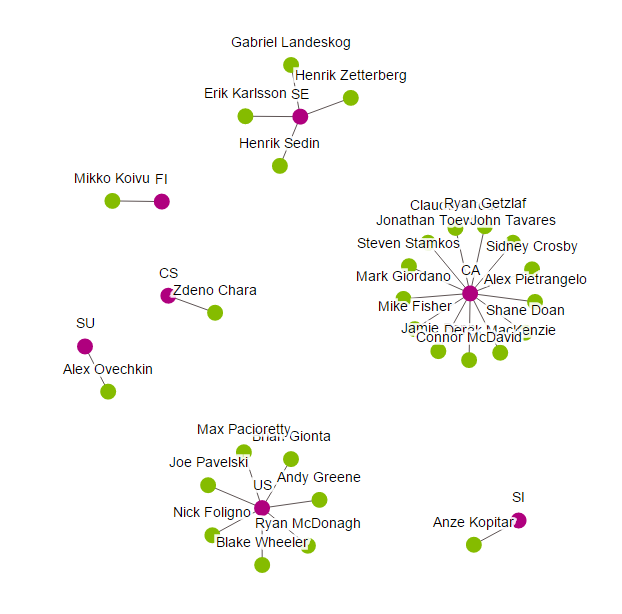

In [12]:
#The image shows up in they jupyter notebook but not on github so I am printing out an image directly.
from IPython.display import Image
Image(filename='NHLCaptainImage.PNG') 